6. Foods with the following ingredients are the most delicious foods as said by “customer A”. Recommend the best 12 foods for “customer A” in descending order with a suitable graph to show the reasons behind your recommendations. 

    - sweet potato
    - chocolate 
    - dried cranberries 
    - raspberries 
    - icing sugar 
    - ginger 
    - cherries 
    - brandy 

In [45]:
# importing the packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.cm as cm  # Import colormap library


def handle_json_error(filepath):
  # Attempts to load JSON data, returns empty DataFrame on error.
  try:
    return pd.read_json(filepath, lines=True)
  except (FileNotFoundError, json.JSONDecodeError):
    print(f"Error: Could not load data from {filepath}")
    return pd.DataFrame()

# Load data with error handling
data = handle_json_error('recipes.json')
data.head(5)




,Name,url,Description,Author,Ingredients,Method
0,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
1,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...
3,Christmas slaw,https://www.bbcgoodfood.com/recipes/890635/chr...,"A nutty winter salad which is superhealthy, qu...",Good Food,"[2 carrots, halved, ½ white cabbage, shredded,...",[Peel strips from the carrots using a vegetabl...
4,Christmas mess,https://www.bbcgoodfood.com/recipes/2806664/ch...,Delicious and a synch to make! Have made this ...,Caroline Hire,"[600ml double cream, 400g Greek yoghurt, 4 tbs...",[In a small saucepan gently heat the frozen be...


In [46]:
# Pre-processing with stemming and lemmatization
def preprocess_ingredient(ingredient):
  ingredient = ingredient.strip().lower()
  ingredient = re.sub(r'[^\w\s]', '', ingredient)  # Remove special characters and punctuation
  ps = PorterStemmer()  # Initialize Porter stemmer
  wnl = WordNetLemmatizer()  # Initialize WordNet lemmatizer
  # Apply both stemming and lemmatization for better coverage
  ingredient = ps.stem(wnl.lemmatize(ingredient))
  return ingredient

# Normalize ingredients in data['Ingredients']
data['Ingredients'] = data['Ingredients'].apply(lambda ingredients: [ingredient.strip().lower() for ingredient in ingredients])


#  ingredients for "customer A"
preferred_ingredients = ["brandy", "sweet potato","chocolate","ginger","cherries", "dried cranberries", "raspberries", "icing sugar"]

preferred_ingredients = [preprocess_ingredient(ingredient) for ingredient in preferred_ingredients]





In [47]:

# Function to check if a food contains preferred ingredients
def contains_preferred_ingredients(ingredients):
    return any(preferred_ingredient in ' '.join(ingredients) for preferred_ingredient in preferred_ingredients)


# Filter foods that contain preferred ingredients
data['ContainsPreferredIngredients'] = data['Ingredients'].apply(contains_preferred_ingredients)
filtered_data = data[data['ContainsPreferredIngredients']]

# Function to count unique matched preferred ingredients for each food
def count_unique_matches(ingredients):
    ingredients_str = ' '.join(ingredients)
    unique_matches = set()
    for preferred_ingredient in preferred_ingredients:
        if preferred_ingredient in ingredients_str:
            unique_matches.add(preferred_ingredient)
    return len(unique_matches)
    
# Count matched preferred ingredients for each food
filtered_data['MatchedIngredientsCount'] = filtered_data['Ingredients'].apply(count_unique_matches)

# Sort foods by matched ingredients count and select top 12
recommended_foods = filtered_data.sort_values(by='MatchedIngredientsCount', ascending=False).head(12)

# Assign a score based on the number of matched ingredients (you can adjust this scoring as needed)
recommended_foods['Score'] = recommended_foods['MatchedIngredientsCount'] / len(preferred_ingredients) * 100

# Print and visualize the top recommended foods (same as before with additional styling)
print(recommended_foods[['Name', 'Score']].to_string(index=False))



                                         Name  Score
                Cranberry pecan & ginger loaf   50.0
              Enchanted forest Christmas cake   50.0
                White forest meringue roulade   37.5
                        Magical reindeer cake   37.5
                  Black Forest Christmas fool   37.5
                Pure gold Christmas drip cake   37.5
                     Simple gingerbread house   37.5
                              Gingerbread man   37.5
    Chocolate pudding with spiced berry syrup   37.5
Chocolate orange & cranberry red velvet bombe   37.5
                          Black Forest trifle   37.5
                        Caramel chocolate log   37.5


C:\Users\BhagyaWijeratne\AppData\Local\Temp\ipykernel_20044\3463862982.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['MatchedIngredientsCount'] = filtered_data['Ingredients'].apply(count_unique_matches)


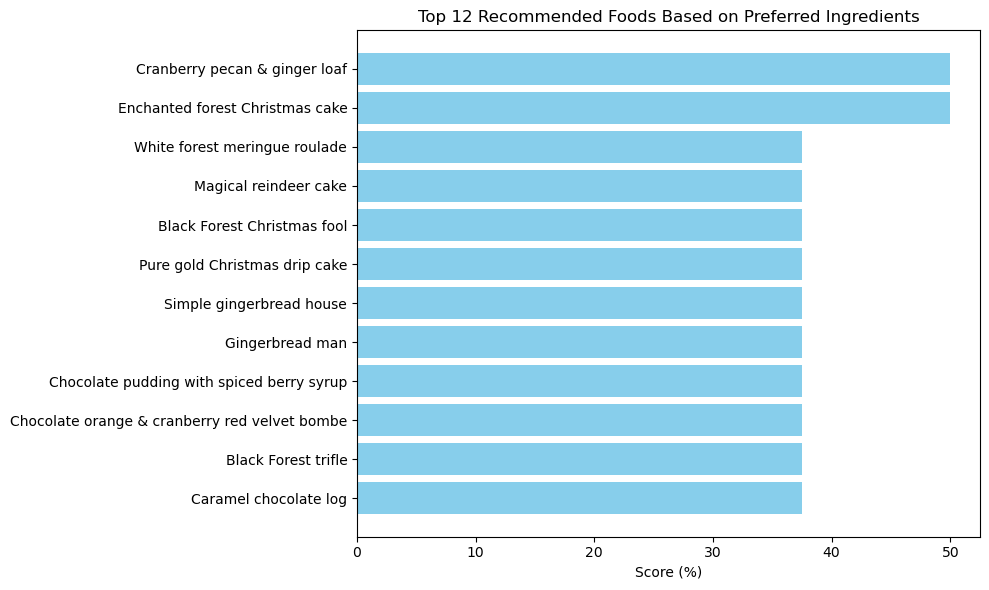

In [48]:
# Visualization: Bar chart to show the ranking
plt.figure(figsize=(10, 6))
plt.barh(recommended_foods['Name'], recommended_foods['Score'], color='skyblue')
plt.xlabel('Score (%)')
plt.title('Top 12 Recommended Foods Based on Preferred Ingredients')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()